In [1]:
import pandas as pd

# Load your dataset
file_path = '/content/kc_final.csv'  # Update this to the path of your uploaded dataset
data = pd.read_csv(file_path)


In [2]:
# Display the first few rows of the dataset and some basic information
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21613 non-null  int64  
 5   bathrooms      21613 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

(None,
    Unnamed: 0          id        date     price  bedrooms  bathrooms  \
 0           0  7129300520  2014-10-13  221900.0         3       1.00   
 1           1  6414100192  2014-12-09  538000.0         3       2.25   
 2           2  5631500400  2015-02-25  180000.0         2       1.00   
 3           3  2487200875  2014-12-09  604000.0         4       3.00   
 4           4  1954400510  2015-02-18  510000.0         3       2.00   
 
    sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
 0         1180      5650     1.0           0  ...      7        1180   
 1         2570      7242     2.0           0  ...      7        2170   
 2          770     10000     1.0           0  ...      6         770   
 3         1960      5000     1.0           0  ...      7        1050   
 4         1680      8080     1.0           0  ...      8        1680   
 
    sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
 0              0      1955             0

In [4]:
# Convert 'DateTime' to datetime format
data['date'] = pd.to_datetime(data['date'])

# Checking for any anomalies or outliers in 'price' and 'bedrooms'
price_describe = data['price'].describe()
bedrooms_describe = data['bedrooms'].describe()
sqft_describe = data['sqft_lot'].describe()
floors_describe = data['floors'].describe()
yr_built_describe = data['yr_built'].describe()

price_describe, bedrooms_describe, sqft_describe, floors_describe, yr_built_describe

(count    2.161300e+04
 mean     5.400881e+05
 std      3.671272e+05
 min      7.500000e+04
 25%      3.219500e+05
 50%      4.500000e+05
 75%      6.450000e+05
 max      7.700000e+06
 Name: price, dtype: float64,
 count    21613.000000
 mean         3.370842
 std          0.930062
 min          0.000000
 25%          3.000000
 50%          3.000000
 75%          4.000000
 max         33.000000
 Name: bedrooms, dtype: float64,
 count    2.161300e+04
 mean     1.510697e+04
 std      4.142051e+04
 min      5.200000e+02
 25%      5.040000e+03
 50%      7.618000e+03
 75%      1.068800e+04
 max      1.651359e+06
 Name: sqft_lot, dtype: float64,
 count    21613.000000
 mean         1.494309
 std          0.539989
 min          1.000000
 25%          1.000000
 50%          1.500000
 75%          2.000000
 max          3.500000
 Name: floors, dtype: float64,
 count    21613.000000
 mean      1971.005136
 std         29.373411
 min       1900.000000
 25%       1951.000000
 50%       1975.000000

In [7]:
# Feature Engineering: Extracting time-related features
data_processed = data

# Extracting year, month, and day of the week from 'datesold'
data_processed['year_sold'] = data_processed['date'].dt.year
data_processed['month_sold'] = data_processed['date'].dt.month
data_processed['day_of_week_sold'] = data_processed['date'].dt.dayofweek  # Monday=0, Sunday=6

# Displaying the first few rows of the updated dataset
data_processed_head = data_processed.head()

# Getting basic statistics of the new features
year_sold_stats = data_processed['year_sold'].value_counts().sort_index()
month_sold_stats = data_processed['month_sold'].value_counts().sort_index()
day_of_week_sold_stats = data_processed['day_of_week_sold'].value_counts().sort_index()

data_processed_head, year_sold_stats, month_sold_stats, day_of_week_sold_stats

(   Unnamed: 0          id       date     price  bedrooms  bathrooms  \
 0           0  7129300520 2014-10-13  221900.0         3       1.00   
 1           1  6414100192 2014-12-09  538000.0         3       2.25   
 2           2  5631500400 2015-02-25  180000.0         2       1.00   
 3           3  2487200875 2014-12-09  604000.0         4       3.00   
 4           4  1954400510 2015-02-18  510000.0         3       2.00   
 
    sqft_living  sqft_lot  floors  waterfront  ...  yr_built  yr_renovated  \
 0         1180      5650     1.0           0  ...      1955             0   
 1         2570      7242     2.0           0  ...      1951          1991   
 2          770     10000     1.0           0  ...      1933             0   
 3         1960      5000     1.0           0  ...      1965             0   
 4         1680      8080     1.0           0  ...      1987             0   
 
    zipcode      lat     long  sqft_living15  sqft_lot15  year_sold  \
 0    98178  47.5112 -122

In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

# Choosing normalization (MinMaxScaler) as it's more suitable for non-Gaussian distributions
# and more robust to outliers

# Selecting numerical columns for normalization
numerical_columns = ['price', 'bedrooms', 'sqft_lot', 'floors', 'yr_built']

# Instantiating the scaler
scaler = MinMaxScaler()

# Normalizing the numerical columns
data_normalized = data_processed.copy()
data_normalized[numerical_columns] = scaler.fit_transform(data_processed[numerical_columns])

# Displaying the first few rows of the normalized data
normalized_head = data_normalized.head()

# Checking the new scaled values
normalized_stats = data_normalized[numerical_columns].describe()

normalized_head, normalized_stats

(   Unnamed: 0          id       date     price  bedrooms  bathrooms  \
 0           0  7129300520 2014-10-13  0.019266  0.090909       1.00   
 1           1  6414100192 2014-12-09  0.060721  0.090909       2.25   
 2           2  5631500400 2015-02-25  0.013770  0.060606       1.00   
 3           3  2487200875 2014-12-09  0.069377  0.121212       3.00   
 4           4  1954400510 2015-02-18  0.057049  0.090909       2.00   
 
    sqft_living  sqft_lot  floors  waterfront  ...  yr_built  yr_renovated  \
 0         1180  0.003108     0.0           0  ...  0.478261             0   
 1         2570  0.004072     0.4           0  ...  0.443478          1991   
 2          770  0.005743     0.0           0  ...  0.286957             0   
 3         1960  0.002714     0.0           0  ...  0.565217             0   
 4         1680  0.004579     0.0           0  ...  0.756522             0   
 
    zipcode      lat     long  sqft_living15  sqft_lot15  year_sold  \
 0    98178  47.5112 -122

In [14]:
from sklearn.cluster import DBSCAN

# Parameter Selection for DBSCAN
# These parameters may need to be fine-tuned depending on the initial results
eps = 0.3  # Example epsilon value
min_samples = 10  # Minimum number of samples for a core point

# Applying DBSCAN to the dataset
dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan_model.fit_predict(data_normalized[numerical_columns])

# Adding the cluster labels to our dataset
data_clustered = data_normalized.copy()
data_clustered['cluster'] = cluster_labels

# Evaluating the Clustering Results
# Counting the number of points in each cluster and the number of noise points (-1 label)
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()

cluster_counts, data_clustered.head()

(-1        9
  0    21604
 dtype: int64,
    Unnamed: 0          id       date     price  bedrooms  bathrooms  \
 0           0  7129300520 2014-10-13  0.019266  0.090909       1.00   
 1           1  6414100192 2014-12-09  0.060721  0.090909       2.25   
 2           2  5631500400 2015-02-25  0.013770  0.060606       1.00   
 3           3  2487200875 2014-12-09  0.069377  0.121212       3.00   
 4           4  1954400510 2015-02-18  0.057049  0.090909       2.00   
 
    sqft_living  sqft_lot  floors  waterfront  ...  yr_renovated  zipcode  \
 0         1180  0.003108     0.0           0  ...             0    98178   
 1         2570  0.004072     0.4           0  ...          1991    98125   
 2          770  0.005743     0.0           0  ...             0    98028   
 3         1960  0.002714     0.0           0  ...             0    98136   
 4         1680  0.004579     0.0           0  ...             0    98074   
 
        lat     long  sqft_living15  sqft_lot15  year_sold  m

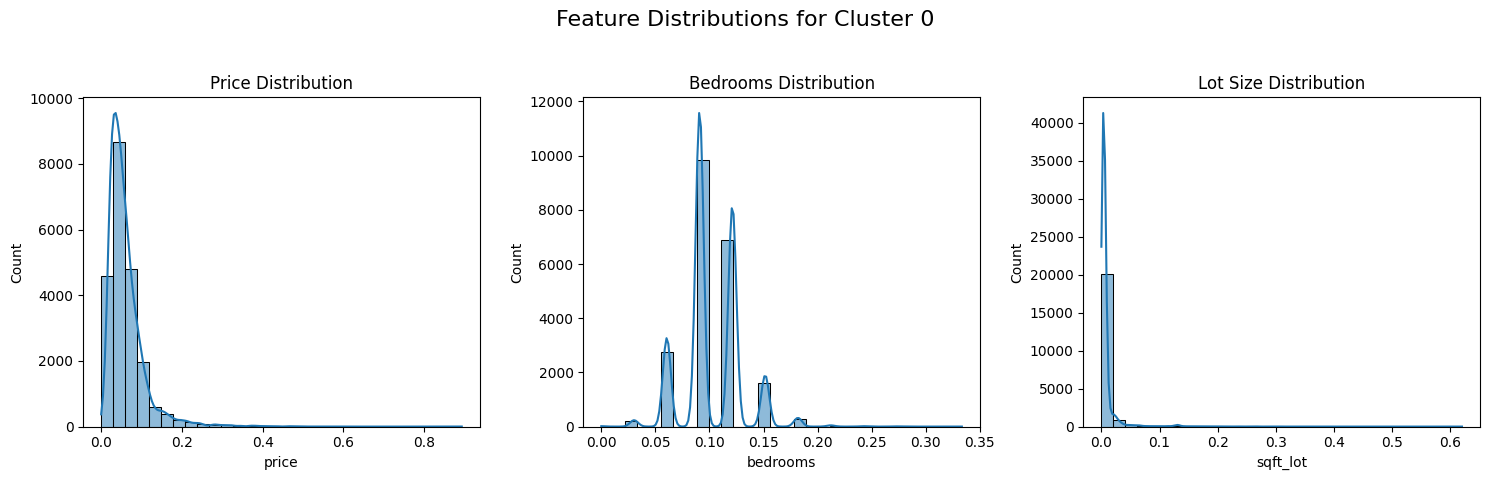

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing Cluster Characteristics

# Preparing data for analysis
cluster_0 = data_clustered[data_clustered['cluster'] == 0]
cluster_1 = data_clustered[data_clustered['cluster'] == 1]
noise_data = data_clustered[data_clustered['cluster'] == -1]

# Analyzing key features for each cluster
def analyze_cluster_features(cluster_data, cluster_label):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Feature Distributions for Cluster {cluster_label}', fontsize=16)

    sns.histplot(cluster_data['price'], bins=30, ax=axes[0], kde=True)
    axes[0].set_title('Price Distribution')

    sns.histplot(cluster_data['bedrooms'], bins=30, ax=axes[1], kde=True)
    axes[1].set_title('Bedrooms Distribution')

    sns.histplot(cluster_data['sqft_lot'], bins=30, ax=axes[2], kde=True)
    axes[2].set_title('Lot Size Distribution')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Analyzing clusters
analyze_cluster_features(cluster_0, 0)

# If needed, analyzing noise data
# analyze_cluster_features(noise_data, 'Noise')